Importação das bibliotecas necessárias e definição de funções auxiliares:

In [39]:
import cv2
import os
import pytesseract
import numpy as np
from src import ocr
from matplotlib import pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

Seleção da imagem a ser processada:

In [40]:
img_inicial_path = './Codigos/Letra Branca/Cod (18).jpg'
img_inicial = cv2.imread(img_inicial_path)
VALOR_T = 195  # Quanto mais clara a imagem, maior deve ser esse valor (Max - 255)

Função que mostra a imagem em uma janela com o título especificado:

In [41]:
def show(img_path, title):
    dpi = 60
    img_data = plt.imread(img_path)
    if len(img_data.shape) == 3:
        height, width, depth = img_data.shape
    else:
        height, width = img_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(img_data, cmap='gray')

    plt.title(title)
    plt.show()

Função que cria o arquivo na pasta de Resultados e passa para a função que mostra a imagem:

In [42]:
def display(img, img_name):
    img_path = f'./Resultado/img_{img_name}.png'

    cv2.imwrite(img_path, img)

    show(img_path, f"Imagem {img_name}")

Imagem inicial:

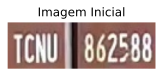

In [43]:
display(img_inicial, "Inicial")

Imagem redimensionada:

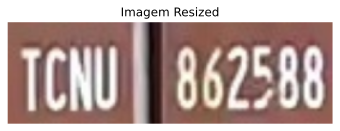

In [44]:
scale_percent = 220  # percent of original size
width = int(img_inicial.shape[1] * scale_percent / 100)
height = int(img_inicial.shape[0] * scale_percent / 100)
dim = (width, height)
img_resized = cv2.resize(img_inicial, dim, interpolation=cv2.INTER_LINEAR)

display(img_resized, "Resized")

Imagem em escala de cinza:

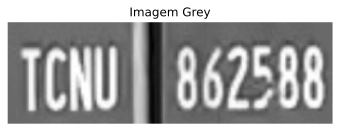

In [45]:
img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

display(img_gray, "Grey")

Imagem invertida (necessária nos casos do texto ser preto):

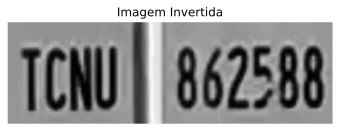

In [46]:
img_invert = cv2.bitwise_not(img_gray)

display(img_invert, "Invertida")

Imagem binarizada:

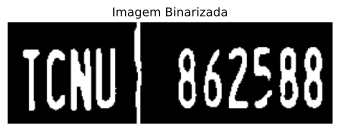

In [47]:
valorThresh = VALOR_T
cv2.waitKey(0)
thresh = valorThresh
img_binarizada = cv2.threshold(img_gray, thresh, 255, cv2.THRESH_BINARY)[1] # Usada para imagens com letra branca
#img_binarizada = cv2.threshold(img_invert, thresh, 255, cv2.THRESH_BINARY)[1] # Usada para imagens de letra preta


display(img_binarizada, "Binarizada")

Imagem dilatada:

In [48]:
# element_estr = cv2.getStructuringElement(cv2.MORPH_CROSS, (2, 2))
# img_dilatada = cv2.dilate(img_binarizada, element_estr, iterations=1)

# display(img_dilatada, "Dilatada")

Imagem erodida:

In [49]:
# element_estr = cv2.getStructuringElement(cv2.MORPH_CROSS, (2, 2))
# img_erodida = cv2.erode(img_dilatada, element_estr, iterations=1)

# display(img_erodida, "Erodida")

Atribuição da imagem final:

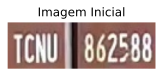

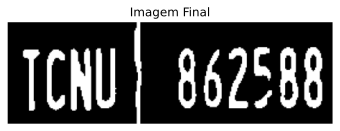

In [50]:
img_final = img_binarizada
display(img_inicial, "Inicial")
display(img_final, "Final")

Configurações do OCR "simples":

In [51]:
# config = r'--psm 6 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 load_freq_dawg=false load_system_dawg=false'
# pytesseract.image_to_string('./Resultado/ImagemNova.jpg', config=config)

Execução do OCR completo:

In [52]:
print(ocr.find_code_in_image(img_final))

Código não lido corretamente!
TCNU 862588 
